In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")

from local_plot import *
#plt.tight_layout(pad=1.0, w_pad=0.2, h_pad=1.0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rc("figure", figsize=(15,10))
bag = None

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


<Figure size 432x288 with 0 Axes>

In [13]:
nodes = [1, 4]
main_id = 4
P_align_pos_1 = np.array([-110.11, 113.44, -136.26]) # Position of putting right front gear on center
P_align_pos_4 = np.array([[-103.06, 113.44, -137.47]]) # Position of putting right front gear on center
P_align_corner = np.array([98.92,-117.94,-71]) + np.array([10, 10, 0]) - np.array([60, 0, 0])

P_vicon_in_imu ={
    1: (P_align_pos_1+P_align_corner)/1000,
    4: ( P_align_pos_4+P_align_corner)/1000
}  

if bag is not None:
    bag.close()
poses, poses_fused, poses_vo, poses_path, t0, bag = bag_read(f"/home/xuhao/bags/swarm_raw_parallel_noyaw_2021-10-18/outputs/fuse_simoutdoor_icra/swarm{main_id}/swarm_local_pc.bag", nodes, True,main_id=main_id)

Init. at 52.37259221076965. Avg. len. 93.0m


In [14]:
plt.close('all')
# detections = []
# loops = []
detections = [] #read_detections_6d(bag, t0, "/swarm_drones/node_detected_6d")
loops = [] #read_loops(bag, t0, "/swarm_loop/loop_connection")
#plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes, use_offline=False, figsize=(10,10), id_map={1:1, 4:2})
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes ,show=False,main_id=main_id, outlier_thres=10)
plot_relative_pose_err(poses, poses_fused, poses_vo, 1, [4], figsize=(15, 10), outlier_thres=10, show=False)
#plt.show()

Absolute Trajectory Statistics
EST:	ATE P	Ang	Yaw	Pitch	Roll		RMSE			COV/m		POS			YAW			KF:	ATE P	Ang	|	VO:ATE_P	Ang	Yaw	Pitch	Roll			ATE			COV/m	POS		YAW	
1by4	0.823	1.637°	1.085°	0.483°	1.136°	0.189,0.431,0.675	1.1e-03,1.4e-03,1.0e-03	2.4e-05rad/m		0.866	1.612°	|	0.326	1.345°	0.392°	0.419°	1.215°	0.211,0.244,0.044	6.5e-04,8.2e-04,3.1e-04	1.7e-05rad
Ego4	0.483	1.695°	1.266°	0.583°	0.957°	0.427,0.223,0.033	3.1e-03,1.6e-03,3.2e-04	1.1e-05rad/m		0.467	1.715°	|	0.437	1.923°	1.132°	1.017°	1.171°	0.385,0.204,0.033	2.2e-03,1.2e-03,3.3e-04	1.5e-05rad
Avg	0.653	0.633°																				|	0.381		0.566°
Relative Trajectory Statistics
EST RMSE:		POS		YAW	|	BIAS: POS			YAW	|VO	RMSE:	POS		YAW
1->4	0.555,0.673,0.661	2.21°	|-0.536,+0.636,+0.656	+2.06°	|	0.210,0.498,0.072	1.0°


(array([0.55509211, 0.67287585, 0.66080727]),
 0.03863258795137858,
 array([0.20998438, 0.49787461, 0.07164805]),
 0.017765345696531674)

Outlier rate 0.00% total loops 257 inter_loops 146 outlier_num 0


/home/xuhao/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xuhao/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:354: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/home/xuhao/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xuhao/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:359: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())
/home/xuhao/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xuhao/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:354: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/home/xuhao/.local/lib/python3.8/s

RMSE: no predictions
RMSE: no predictions
RMSE: no predictions
RMSE: no predictions
Pos cov nan, nan, nan
Yaw cov nan
Pos std nan, nan, nan
Yaw std nan


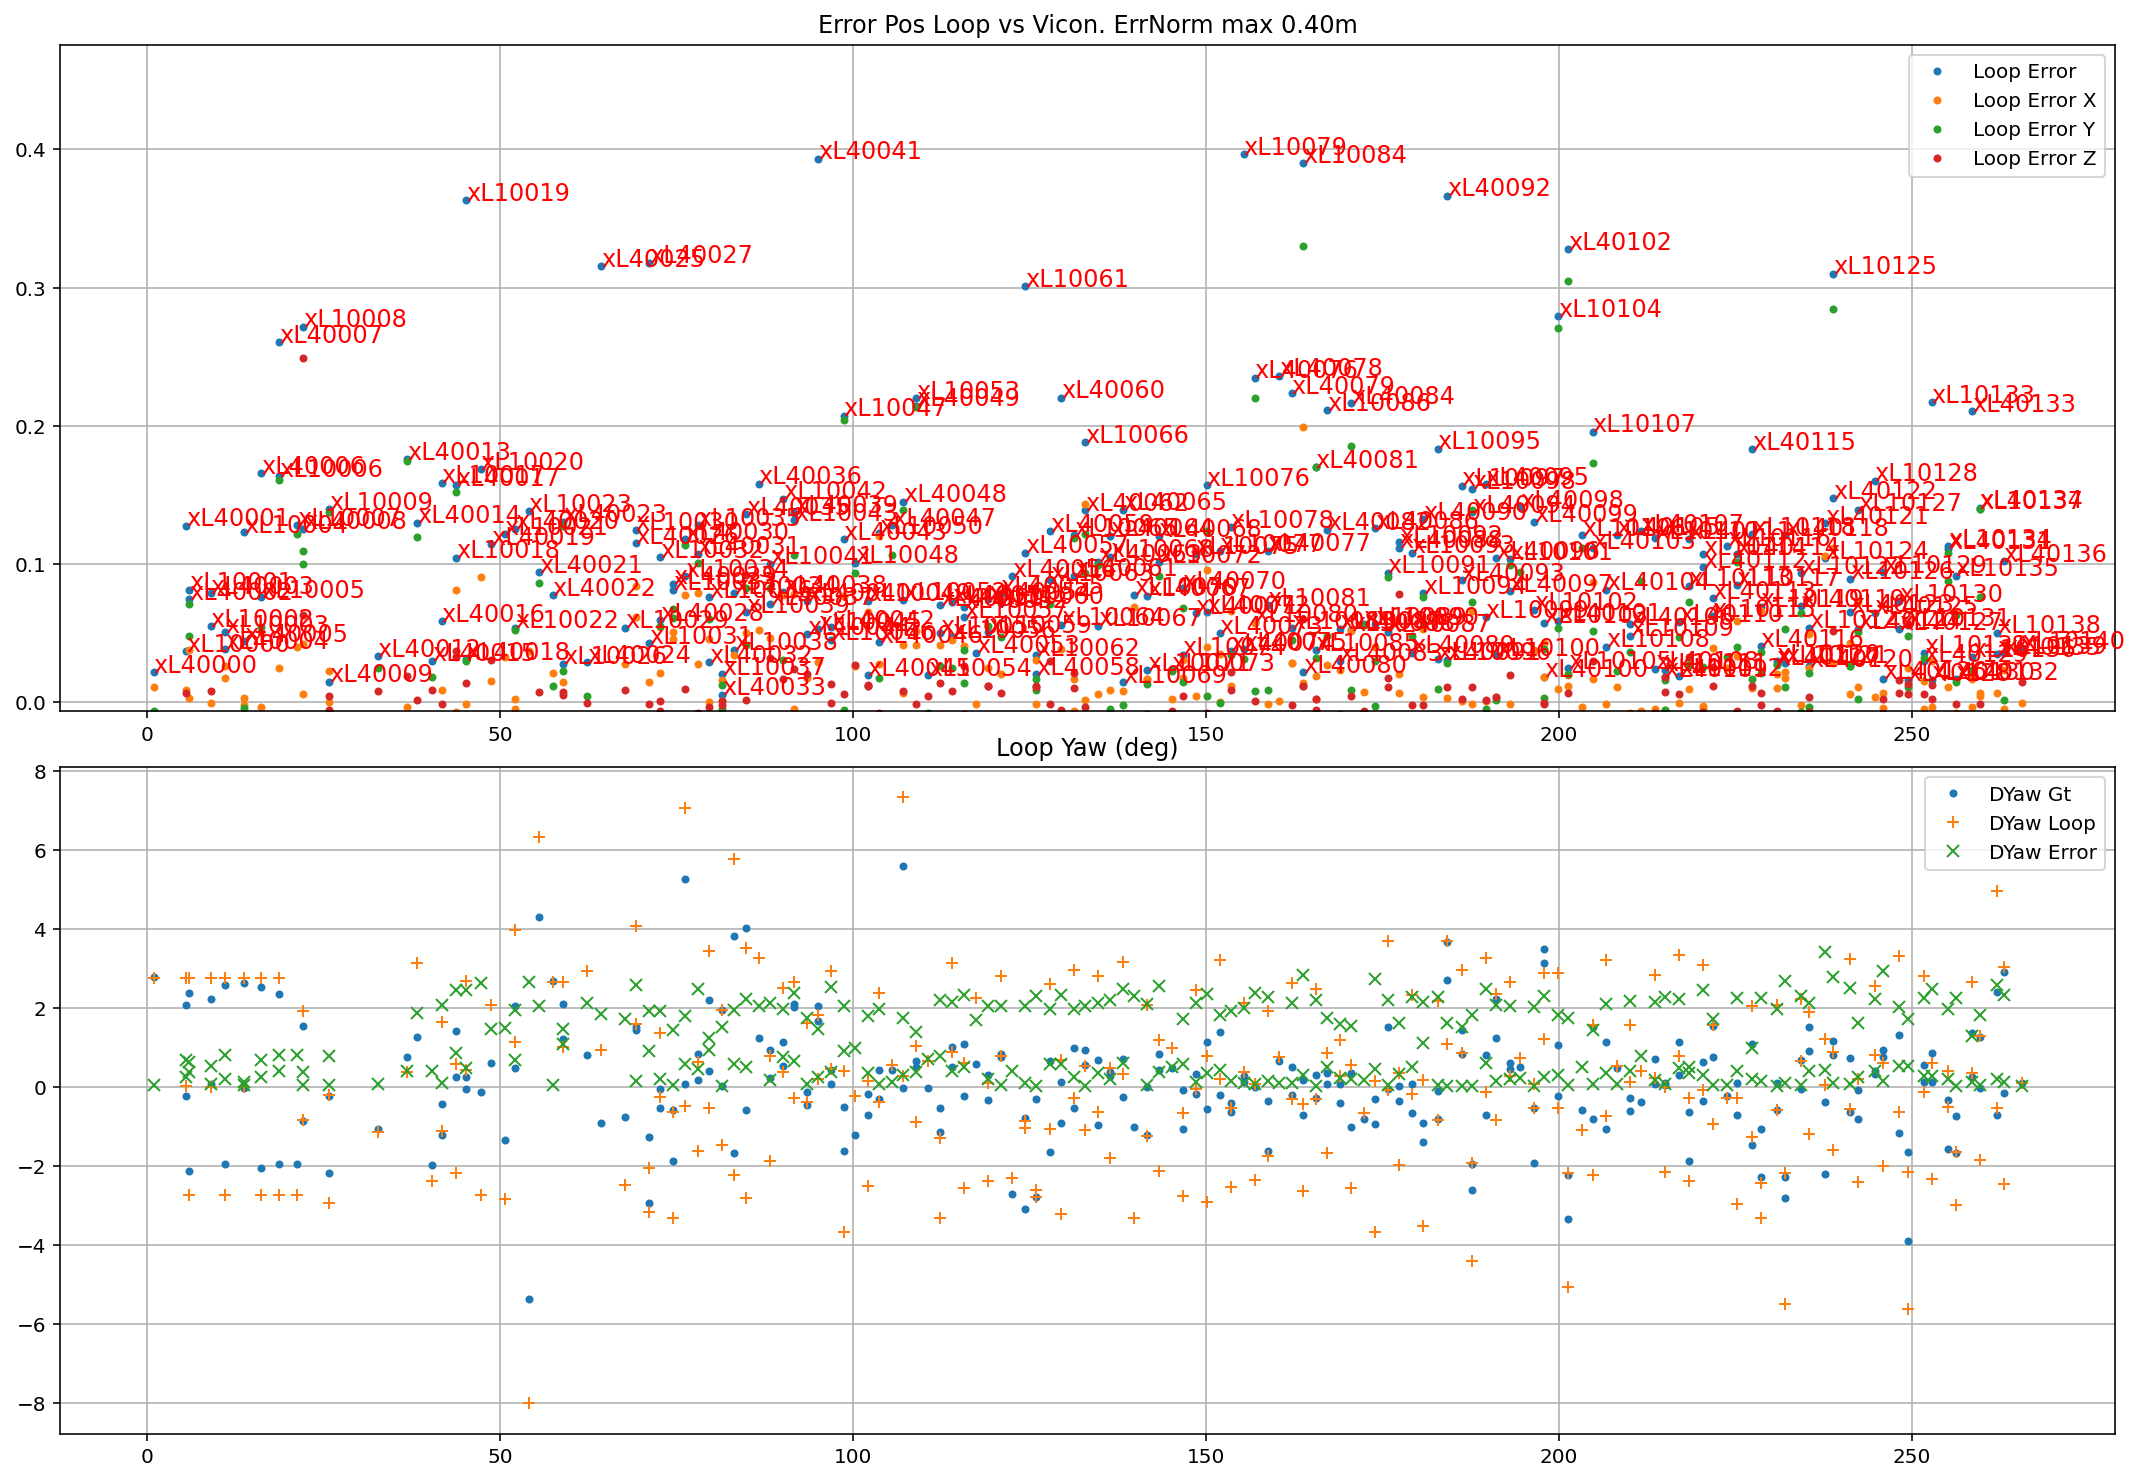

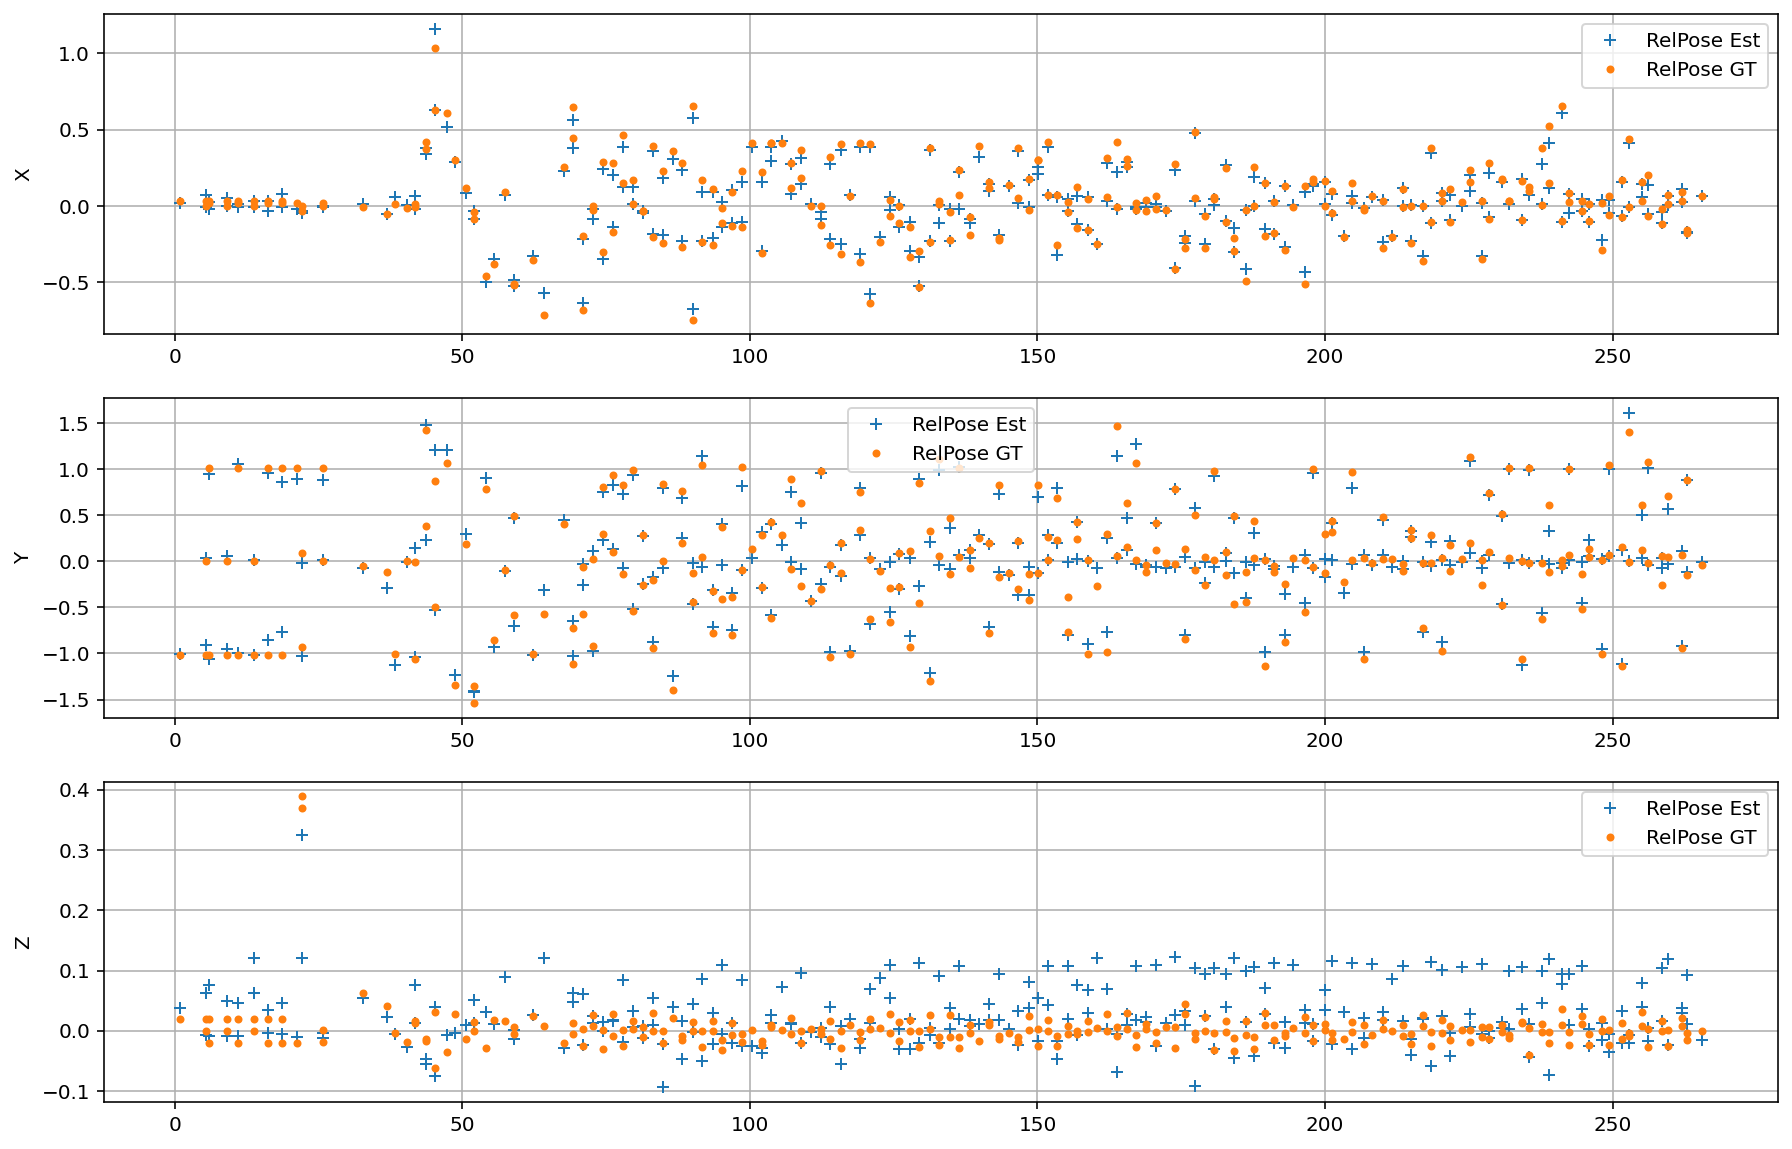

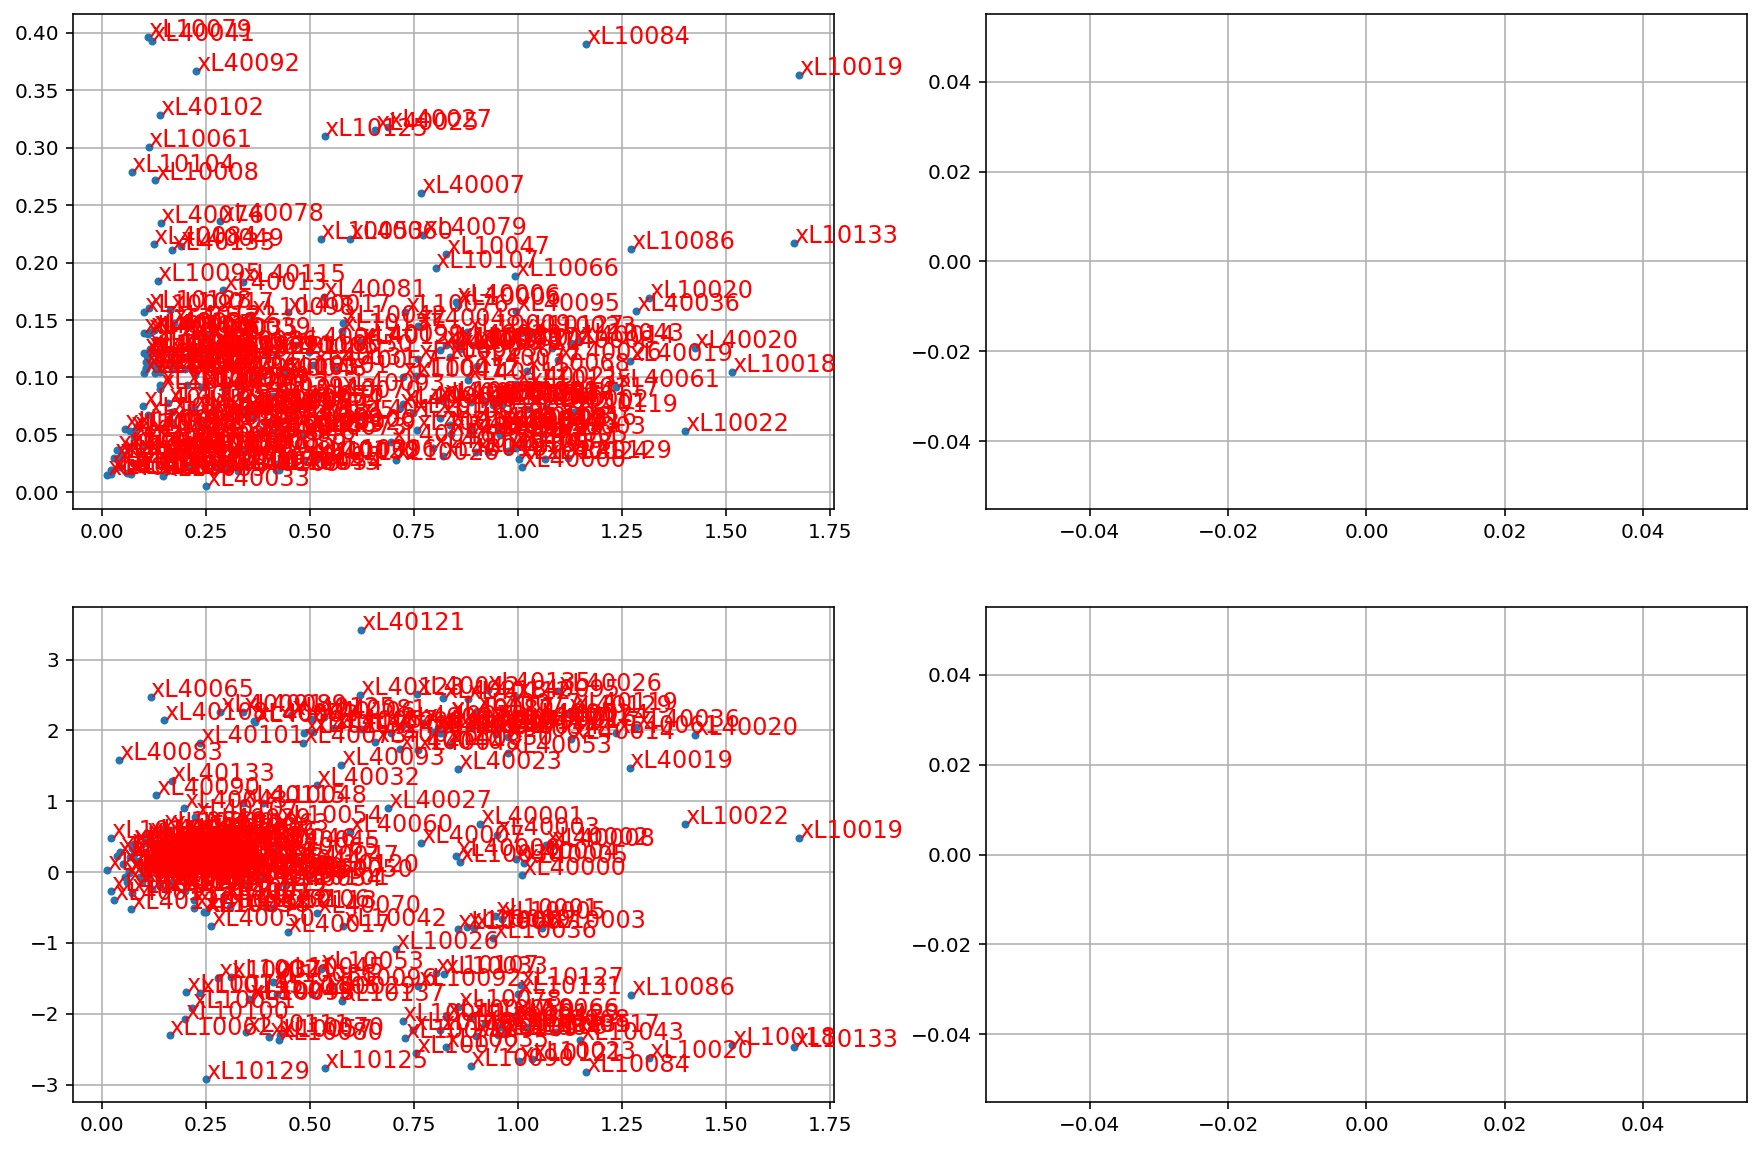

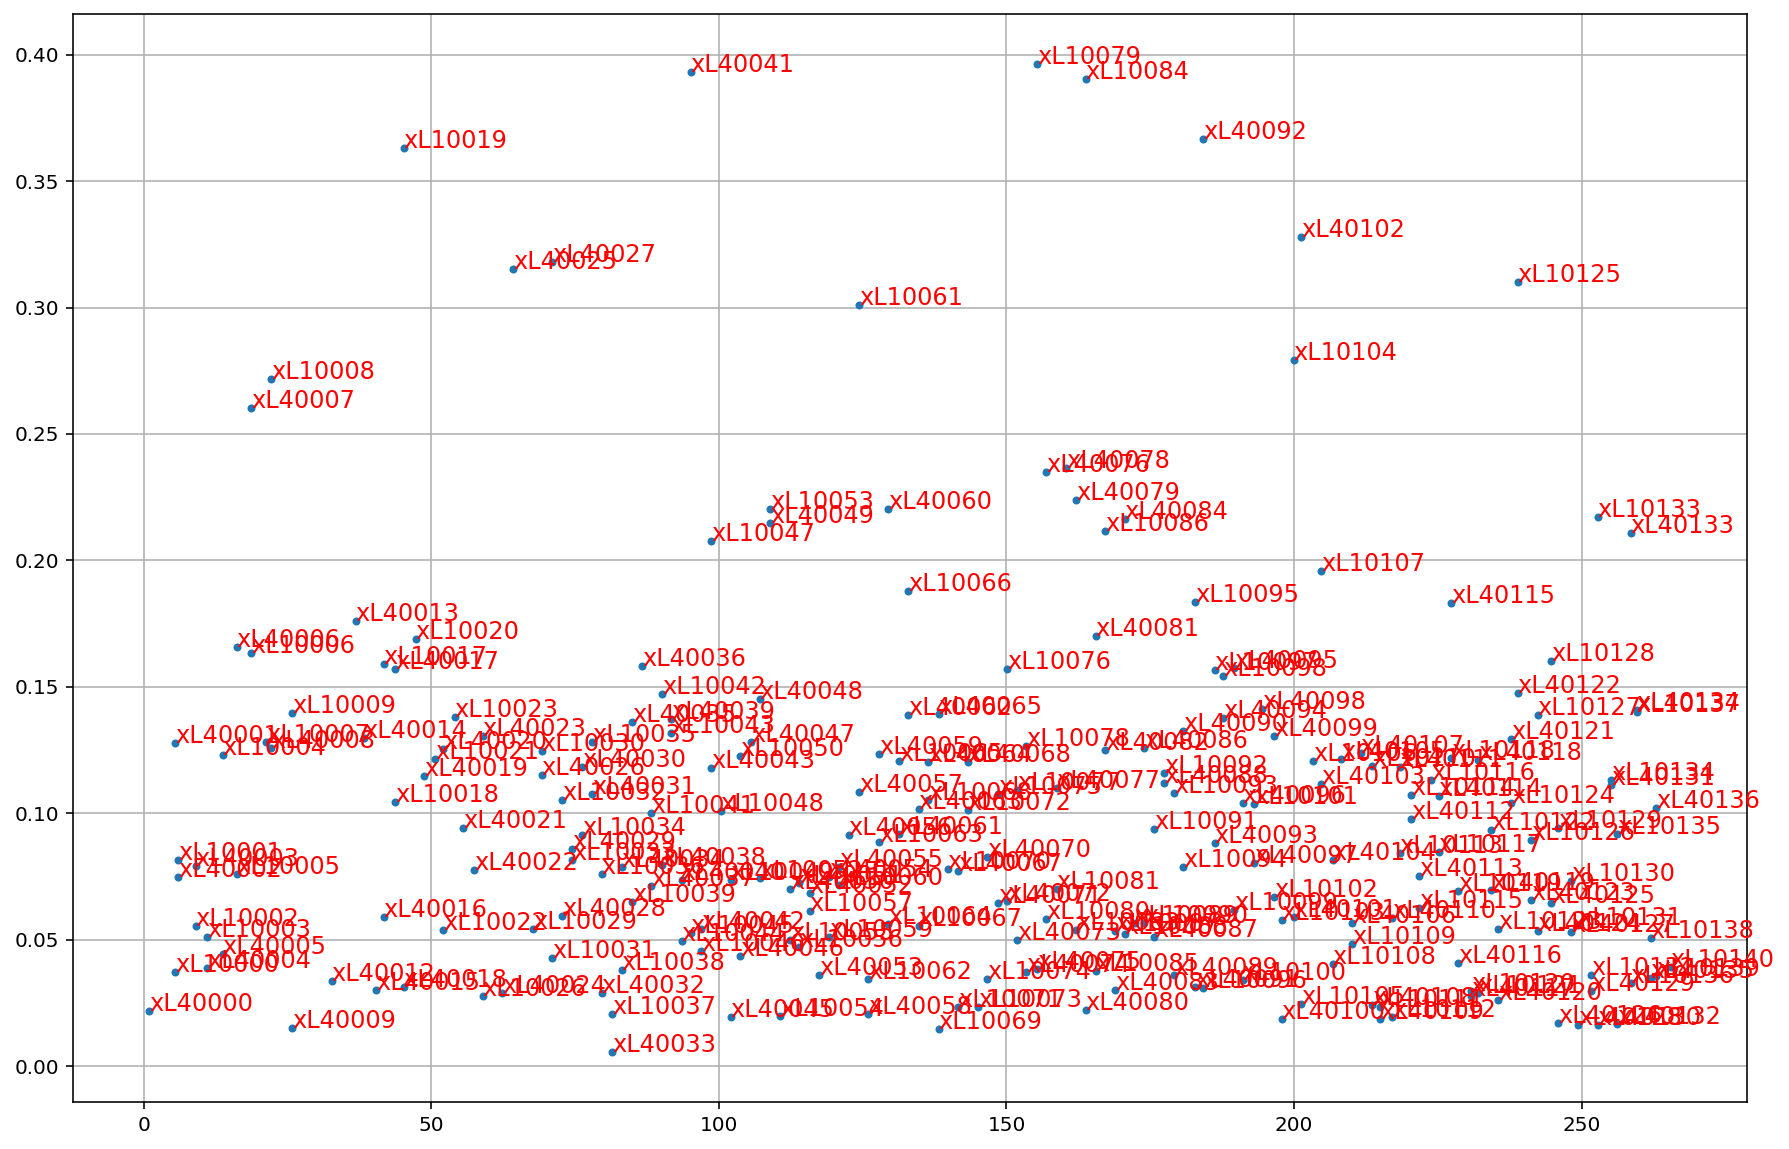

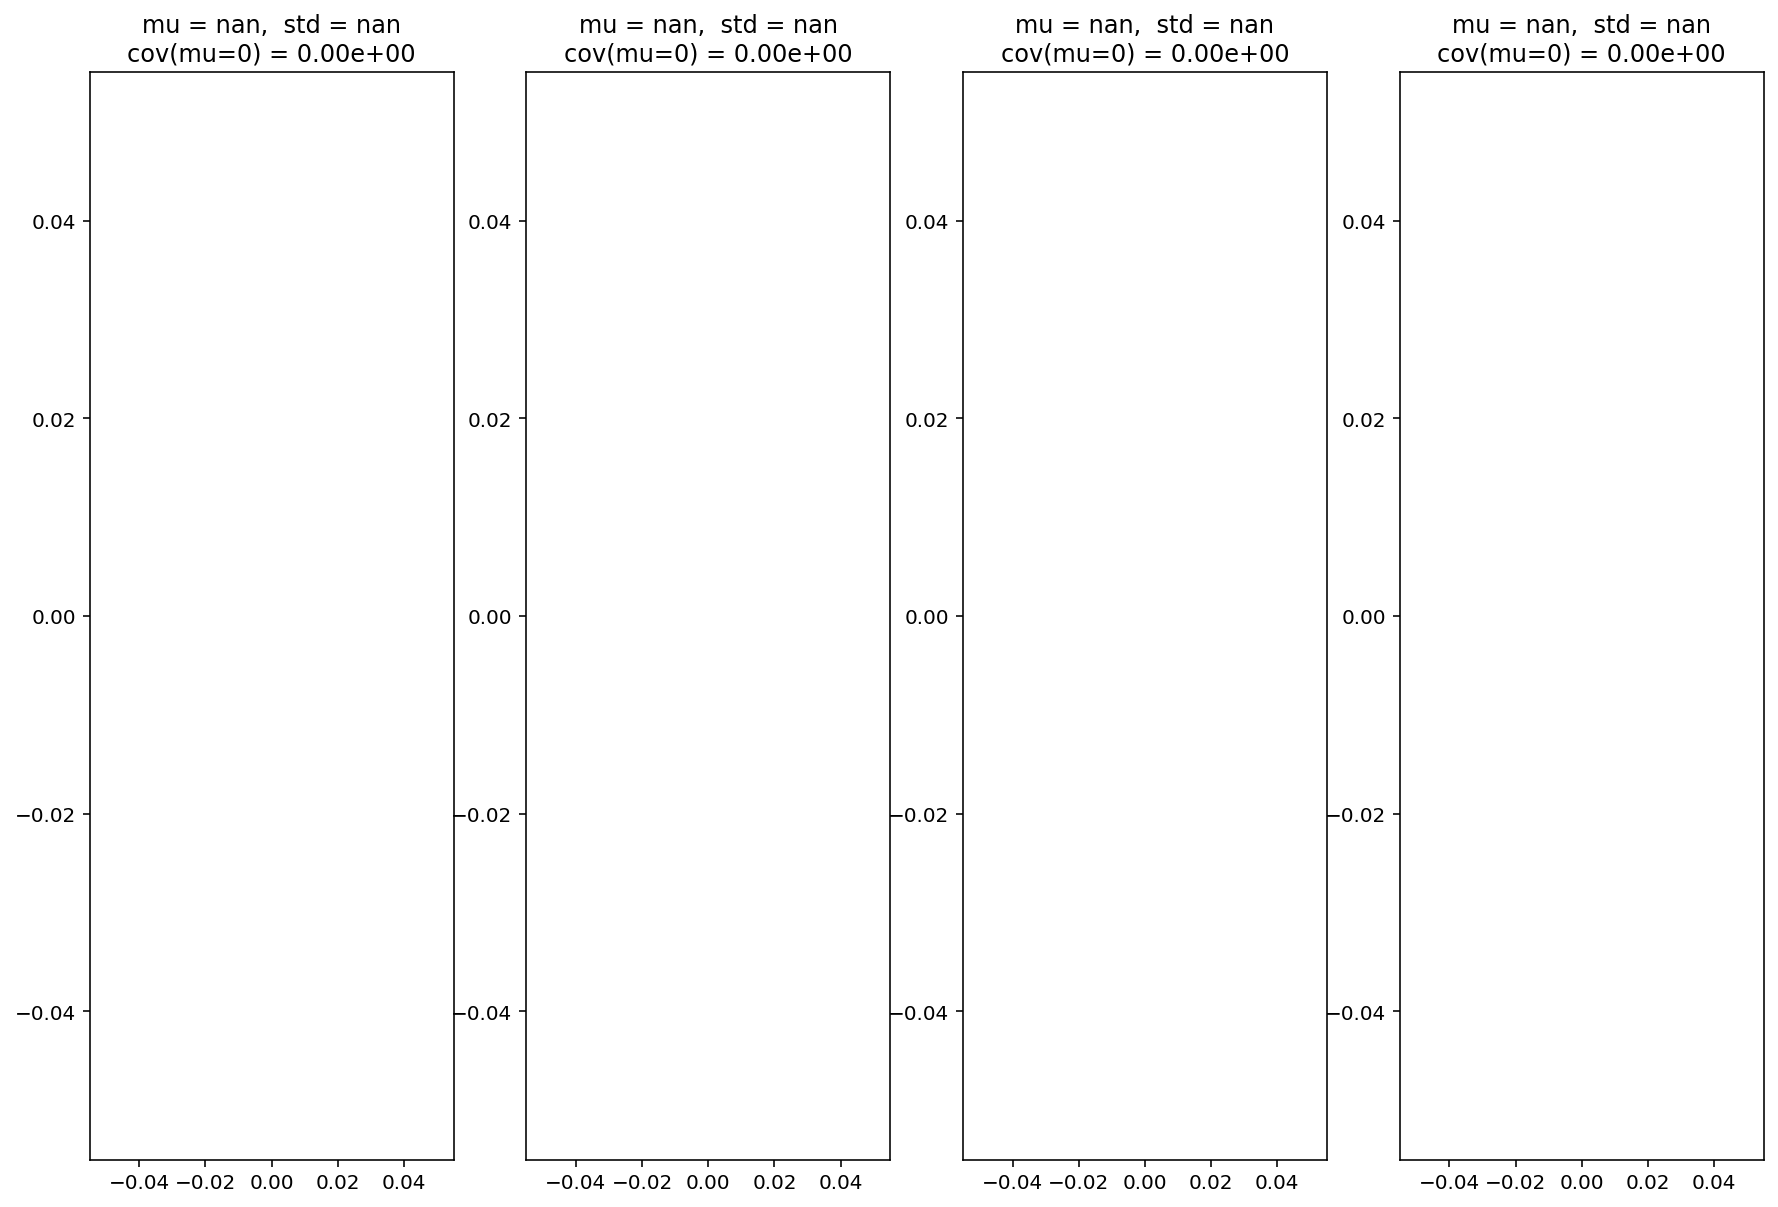

In [8]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
loops = read_loops(bag, t0, "/swarm_loop/loop_connection")
loops_error = plot_loops_error(poses, loops, good_loop_id=inliers[-1], outlier_show_thres=0.4)
#_= debugging_pcm("/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_17-09/outputs/fuse_all/swarm1/", inliers[-1], loops_error, 1.635)

In [ ]:
plt.close("all") 
distance_calib = {
    1: {}
}
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)

plot_distance_err(poses, poses_fused, distances, main_id, nodes, distance_calib[main_id], is_show=True)

In [ ]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
detections = read_detections_6d(bag, t0, "/swarm_drones/node_detected_6d")
loops_error =  plot_loops_error(poses, detections, inliers[-1], outlier_show_thres=10)
# loops_error =  plot_loops_error(poses, detections, None)


In [ ]:
plt.close("all") 
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)
calib = {
    4: [ 0.9499422747931782, 0.002876024957717875]
}
#plot_distance_err(poses, poses_fused, distances, main_id, nodes, is_show=True)
plot_distance_err(poses, poses_fused, distances, main_id, nodes, is_show=True, calib=calib)


In [24]:
plt.plot(poses_vo[1]["t"], poses_vo[1]["t"], 'o' )